# PROJECT REPORT (Intro to Data Science)  Prof: Sourav Medya

#### Problems being investigated : Some of the main problems we are aiming to solve are food wastage, owners loss of inventory, customers not having access to the items they want, stock inadequacy and predicting the food demand over the course of a couple of weeks.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas_profiling as pp
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from catboost import Pool

#### About the dataset : it relates to a meal delivery company and their warehouses in a particular city. The said company delivers said meals to their customers. Since delivery companies like these mostly deal with perishable food items, a system needs to be implemented in order to negate and avoid loss of said items.


#### The dataset we retrieved has details such as week no., mel id’s, center id, base_price, checkout price, etc. for different items in different centers.



In [2]:
train = pd.read_csv('datasets/train_file.csv')
test = pd.read_csv('datasets/test_file.csv')
fulfilment_center = pd.read_csv('datasets/fulfilment_center_info.csv')
meal_info = pd.read_csv('datasets/meal_info.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [5]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [6]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [7]:
fulfilment_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [8]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [9]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [10]:
train = pd.merge(train,fulfilment_center, on='center_id')
test = pd.merge(test,fulfilment_center, on='center_id')

train = pd.merge(train,meal_info, on='meal_id')
test = pd.merge(test,meal_info, on='meal_id')

In [11]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

# Exploratory Data Analysis 

#### The below lineplot is being used to give a visual representation between the number of orders and the week. From this plot we are able to deduce the frequeny of orders over the course of a time period.

C:\Users\SRAVA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week', ylabel='num_orders'>

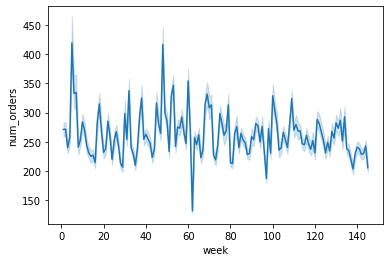

In [13]:
sns.lineplot(train['week'],train['num_orders'])

#### The barplot between center_id and number of orders allows us to know how many orders each center is receiving.

C:\Users\SRAVA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 [Text(0, 0, '10'),
  Text(1, 0, '11'),
  Text(2, 0, '13'),
  Text(3, 0, '14'),
  Text(4, 0, '17'),
  Text(5, 0, '20'),
  Text(6, 0, '23'),
  Text(7, 0, '24'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '29'),
  Text(11, 0, '30'),
  Text(12, 0, '32'),
  Text(13, 0, '34'),
  Text(14, 0, '36'),
  Text(15, 0, '39'),
  Text(16, 0, '41'),
  Text(17, 0, '42'),
  Text(18, 0, '43'),
  Text(19, 0, '50'),
  Text(20, 0, '51'),
  Text(21, 0, '52'),
  Text(22, 0, '53'),
  Text(23, 0, '55'),
  Text(24, 0, '57'),
  Text(25, 0, '58'),
  Text(26, 0, '59'),
  Text(27, 0, '61'),
  Text(28, 0, '64'),
  Text(29, 0, '65'),
  Text(30, 0, '66'),
  Text(31

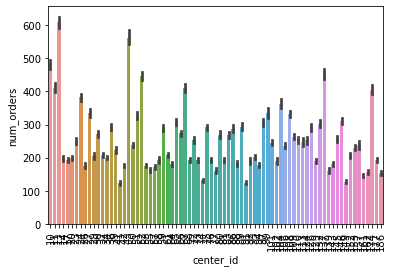

In [14]:
sns.barplot(train['center_id'],train['num_orders'])
plt.xticks(rotation=90)

#### The lineplot below makes use of number of orders and the checkout price, this allows us to know how the number of orders effects the final pricing.

C:\Users\SRAVA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='checkout_price', ylabel='num_orders'>

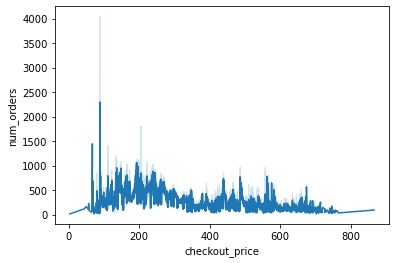

In [15]:
sns.lineplot(train['checkout_price'],train['num_orders'])

#### The barplot between number of orders and categories allows us to know which items are in most demand.

C:\Users\SRAVA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Beverages'),
  Text(1, 0, 'Rice Bowl'),
  Text(2, 0, 'Starters'),
  Text(3, 0, 'Pasta'),
  Text(4, 0, 'Sandwich'),
  Text(5, 0, 'Biryani'),
  Text(6, 0, 'Extras'),
  Text(7, 0, 'Pizza'),
  Text(8, 0, 'Seafood'),
  Text(9, 0, 'Other Snacks'),
  Text(10, 0, 'Desert'),
  Text(11, 0, 'Salad'),
  Text(12, 0, 'Fish'),
  Text(13, 0, 'Soup')])

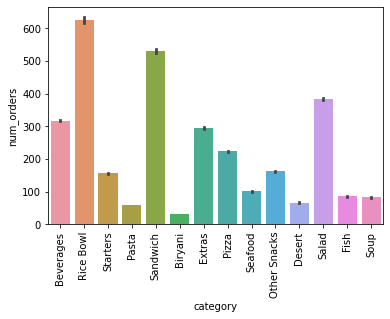

In [16]:
sns.barplot(train['category'],train['num_orders'])
plt.xticks(rotation = '90')

#### The barplot lets us know which cusine has a higher frequency of orders.

C:\Users\SRAVA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cuisine', ylabel='num_orders'>

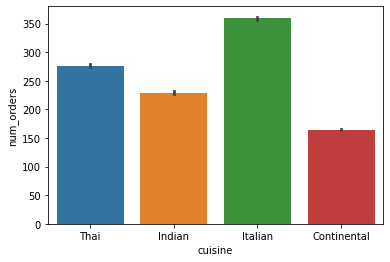

In [17]:
sns.barplot(train['cuisine'],train['num_orders'])
#plt.xticks(rotation = '90')

#### The barplot below lets us the frequency of number of orders based on region.

C:\Users\SRAVA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region_code', ylabel='num_orders'>

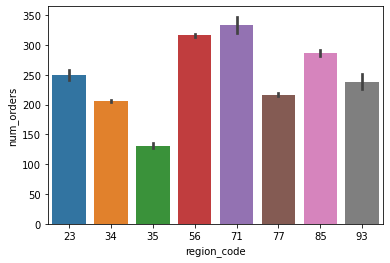

In [18]:
sns.barplot(train['region_code'],train['num_orders'])
#plt.xticks(rotation = '90')

C:\Users\SRAVA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '0.9'),
  Text(1, 0, '1.9'),
  Text(2, 0, '2.0'),
  Text(3, 0, '2.4'),
  Text(4, 0, '2.7'),
  Text(5, 0, '2.8'),
  Text(6, 0, '2.9'),
  Text(7, 0, '3.0'),
  Text(8, 0, '3.2'),
  Text(9, 0, '3.4'),
  Text(10, 0, '3.5'),
  Text(11, 0, '3.6'),
  Text(12, 0, '3.7'),
  Text(13, 0, '3.8'),
  Text(14, 0, '3.9'),
  Text(15, 0, '4.0'),
  Text(16, 0, '4.1'),
  Text(17, 0, '4.2'),
  Text(18, 0, '4.4'),
  Text(19, 0, '4.5'),
  Text(20, 0, '4.6'),
  Text(21, 0, '4.7'),
  Text(22, 0, '4.8'),
  Text(23, 0, '5.0'),
  Text(24, 0, '5.1'),
  Text(25, 0, '5.3'),
  Text(26, 0, '5.6'),
  Text(27, 0, '6.3'),
  Text(28, 0, '6.7'),
  Text(29, 0, '7.0')])

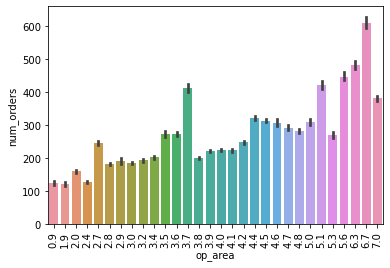

In [19]:
sns.barplot(train['op_area'],train['num_orders'])
plt.xticks(rotation = '90')

C:\Users\SRAVA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([400., 450., 500., 550., 600., 650., 700., 750.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

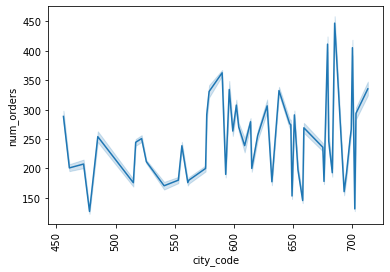

In [20]:
sns.lineplot(train['city_code'],train['num_orders'])
plt.xticks(rotation = '90')

<AxesSubplot:xlabel='num_orders'>

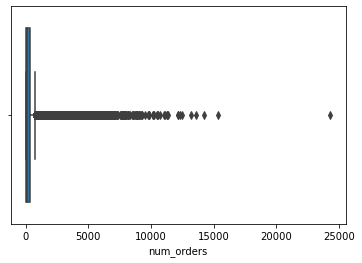

In [21]:
sns.boxplot(x='num_orders',data=train)

<AxesSubplot:xlabel='region_code'>

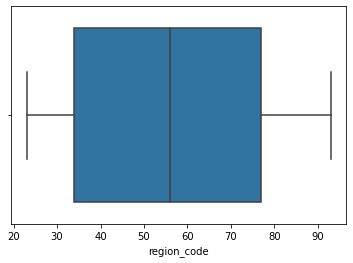

In [22]:
sns.boxplot(x='region_code',data=train)

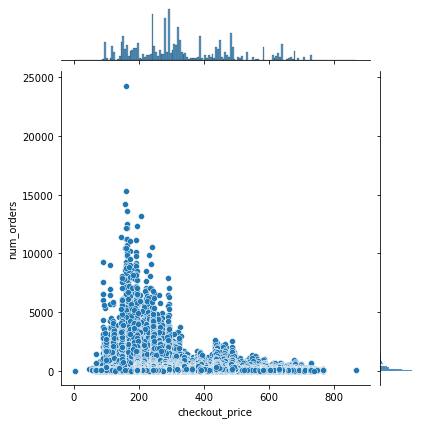

In [23]:
sns.jointplot(x='checkout_price',y='num_orders',data=train)

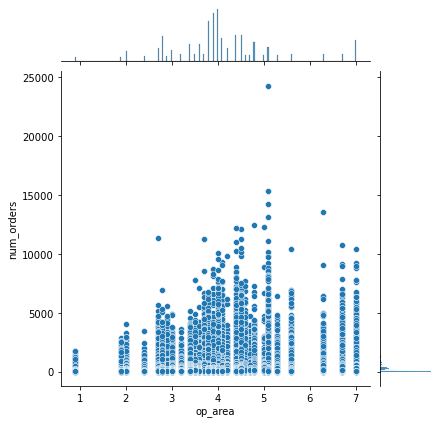

In [24]:
sns.jointplot(x='op_area',y='num_orders',data=train)

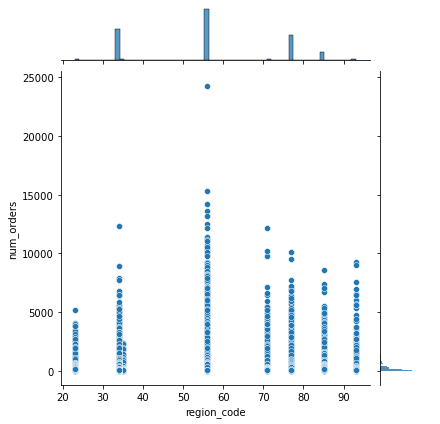

In [25]:
sns.jointplot(x='region_code',y='num_orders',data=train)

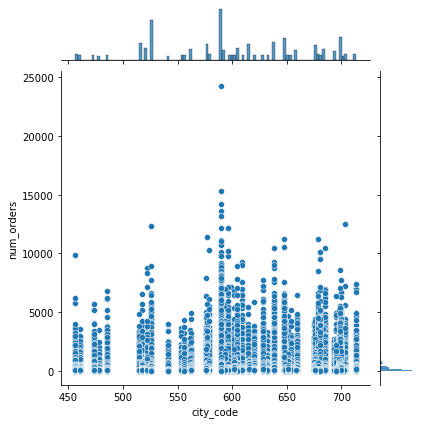

In [26]:
sns.jointplot(x='city_code',y='num_orders',data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Beverages'),
  Text(1, 0, 'Rice Bowl'),
  Text(2, 0, 'Starters'),
  Text(3, 0, 'Pasta'),
  Text(4, 0, 'Sandwich'),
  Text(5, 0, 'Biryani'),
  Text(6, 0, 'Extras'),
  Text(7, 0, 'Pizza'),
  Text(8, 0, 'Seafood'),
  Text(9, 0, 'Other Snacks'),
  Text(10, 0, 'Desert'),
  Text(11, 0, 'Salad'),
  Text(12, 0, 'Fish'),
  Text(13, 0, 'Soup')])

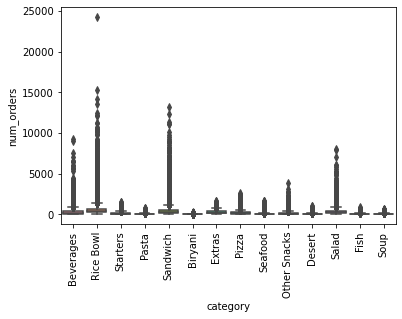

In [27]:
sns.boxplot(x='category',y='num_orders',data=train)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Thai'),
  Text(1, 0, 'Indian'),
  Text(2, 0, 'Italian'),
  Text(3, 0, 'Continental')])

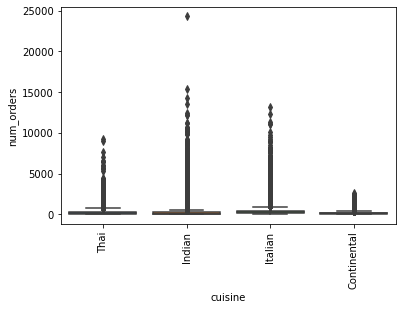

In [28]:
sns.boxplot(x='cuisine',y='num_orders',data=train)
plt.xticks(rotation=90)

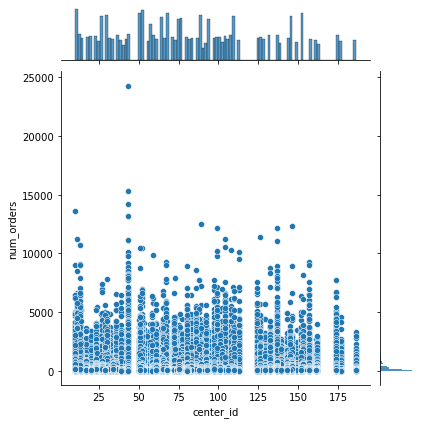

In [29]:
sns.jointplot(x='center_id',y='num_orders',data=train)

In [30]:
print("Total number of centers : ",train['center_id'].nunique())

Total number of centers :  77


In [31]:
print("Total Number of cities: ",train['city_code'].nunique())

Total Number of cities:  51


In [32]:
print("Total Number of cities: ",train['city_code'].nunique())

Total Number of cities:  51


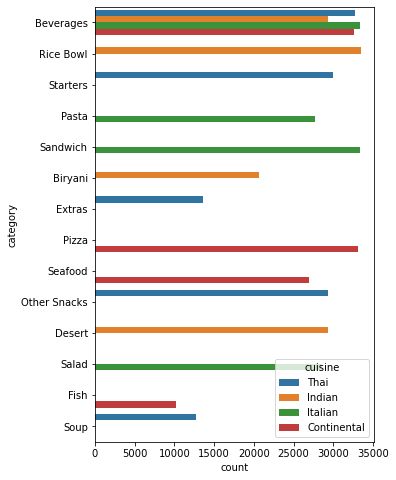

In [33]:
fig, ax = plt.subplots(figsize=(5,8))
sns.countplot(y = train['category'], hue = train['cuisine'], ax=ax)
plt.show()

In [34]:
center_meal_train = (train['center_id'].astype(str) + "_" + train['meal_id'].astype(str)).unique()
print("There are", len(center_meal_train),"center-meal pairs in train data")

There are 3597 center-meal pairs in train data


In [35]:
center_meal_test = (test['center_id'].astype(str) + "_" + test['meal_id'].astype(str)).unique()
print("There are", len(center_meal_test),"center-meal pairs in train data")

There are 3548 center-meal pairs in train data


In [36]:
print("There are",len(set(center_meal_test) - set(center_meal_train)),"New center-meal pairs in test dataset which are not present in train dataset")
print(set(center_meal_test) - set(center_meal_train))

There are 3 New center-meal pairs in test dataset which are not present in train dataset
{'92_2104', '73_2956', '73_1571'}


In [37]:
test[(test['center_id']==73) & (test['meal_id'].isin([2956, 1571]))].shape[0]

11

In [38]:
test[(test['center_id']==92) & (test['meal_id'].isin([2104]))].shape[0]

2

There should be 77*51 = 3927 center-meal pair, but we have 3597 pairs in train data, that means some centers did not sell some of the meals.

There should be 3597*145 = 521565 records in past 145 week data, but we have 456548 records. which means some centers did not sell some meal for some week or they stared selling some new type of meal after some weeks. Same with test data.

Test set has only 3548 center-meal pair, that means some of the centers did not sell some type of meals in this 10 week.

Here in the test set (future 10 week), center 73 started selling meal 2956 & 1571, center 92 started selling meal 2104, which they have never sold in last 145 weeks. There are only 13 records with unknown center-meal pair in test set.

## Removing outliers 

In [39]:
outlier_index = train[(train['num_orders']>15000)].index

In [40]:
train.drop(outlier_index,inplace = True)

## Feature engineering

In [41]:
train['train_or_test'] = 'train'
test['train_or_test'] = 'test'

In [42]:
train['num_orders'] = np.log1p(train['num_orders'])

In [43]:
total_data = train.append(test).reset_index(drop=True)[train.columns]

In [44]:
total_data = total_data.sort_values(['center_id', 'meal_id', 'week']).reset_index(drop=True)

In [45]:
total_data['checkout_price'] = np.log1p(total_data['checkout_price'])
total_data['base_price'] = np.log1p(total_data['base_price'])

In [46]:
total_data['discount_on_base'] = (total_data['base_price'] - total_data['checkout_price']) / total_data['base_price']

In [47]:
total_data["discount_ratio"] = total_data["base_price"] / total_data["checkout_price"]

C:\Users\SRAVA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


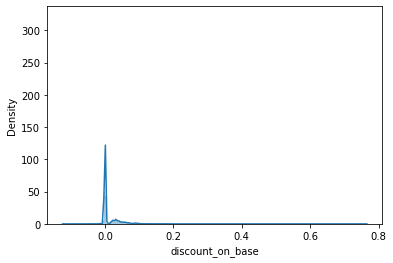

In [48]:
sns.distplot(total_data['discount_on_base'], bins=500)
plt.show()

In [49]:
total_data['price_last_curr_diff'] = (total_data['checkout_price'].shift(1) - total_data['checkout_price']).fillna(1)/ total_data['checkout_price'].shift(1).fillna(1)

In [50]:
for _, r in total_data.groupby(['center_id', 'meal_id'])['week'].first().reset_index().iterrows():
    total_data.loc[(total_data['center_id']==r['center_id']) & (total_data['meal_id']==r['meal_id']) & (total_data['week']==r['week']), 'price_last_curr_diff'] = total_data[(total_data['center_id']==r['center_id']) & (total_data['meal_id']==r['meal_id']) & (total_data['week']!=r['week'])]['price_last_curr_diff'].mean()
total_data['price_last_curr_diff'] = total_data['price_last_curr_diff'].fillna(0)

In [51]:
# Features constructed from previous sales values

#Creating sales lag features
def create_sales_lag_feats(df, gpby_cols, target_col, lags):
    gpby = df.groupby(gpby_cols)
    for i in lags:
        df['_'.join([target_col, 'lag', str(i)])] = \
                gpby[target_col].shift(i).values + np.random.normal(scale=1.6, size=(len(df),))
    return df

# Creating sales exponentially weighted mean features
def create_sales_ewm_feats(df, gpby_cols, target_col, alpha=[0.9], shift=[1]):
    gpby = df.groupby(gpby_cols)
    for a in alpha:
        for s in shift:
            df['_'.join([target_col, 'lag', str(s), 'ewm', str(a)])] = \
                gpby[target_col].shift(s).ewm(alpha=a).mean().values
    return df

In [52]:
# Creating num_orders lag, rolling mean, rolling median, ohe features of the above train set
total_data = create_sales_lag_feats(total_data, gpby_cols=['center_id','meal_id'], target_col='num_orders', 
                               lags=[10,11, 12])

total_data = create_sales_ewm_feats(total_data, gpby_cols=['center_id','meal_id'], 
                               target_col='num_orders', 
                               alpha=[0.5], 
                               shift=[10,11,12,13,14,15])

In [53]:
total_data.head()
total_data.to_csv('total_data.csv', index = False)

In [54]:
### Center count features ###
gdf = total_data.groupby(["center_id", "week"])["id"].agg(['size']).reset_index()
gdf.columns = ["center_id", "week", "center_week_count"]
total_data = pd.merge(total_data,gdf, on=["center_id", "week"], how="left")

gdf = total_data.groupby(["center_id", "category"])["id"].count().reset_index()
gdf.columns = ["center_id", "category", "center_cat_count"]
total_data = pd.merge(total_data,gdf, on=["center_id", "category"], how="left")

gdf = total_data.groupby(["center_id", "category", "week"])["id"].count().reset_index()
gdf.columns = ["center_id", "category", "week", "center_cat_week_count"]
total_data = pd.merge(total_data,gdf, on=["center_id", "category", "week"], how="left")

gdf = total_data.groupby(["center_id", "cuisine"])["id"].count().reset_index()
gdf.columns = ["center_id", "cuisine", "center_cui_count"]
total_data = pd.merge(total_data,gdf, on=["center_id", "cuisine"], how="left")

In [55]:
### Meal count features ###
gdf = total_data.groupby(["meal_id"])["id"].count().reset_index()
gdf.columns = ["meal_id", "meal_count"]
total_data = pd.merge(total_data,gdf, on=["meal_id"], how="left")

gdf = total_data.groupby(["region_code", "meal_id"])["id"].count().reset_index()
gdf.columns = ["region_code", "meal_id", "region_meal_count"]
total_data= pd.merge(total_data,gdf, on=["region_code", "meal_id"], how="left")

gdf = total_data.groupby(["meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["meal_id", "week", "meal_week_count"]
total_data = pd.merge(total_data,gdf, on=["meal_id", "week"], how="left")

gdf =total_data.groupby(["center_type", "meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["center_type", "meal_id", "week", "type_meal_week_count"]
total_data = pd.merge(total_data,gdf, on=["center_type", "meal_id", "week"], how="left")

gdf = total_data.groupby(["region_code", "meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["region_code", "meal_id", "week", "region_meal_week_count"]
total_data = pd.merge(total_data,gdf, on=["region_code", "meal_id", "week"], how="left")

gdf =total_data.groupby(["city_code", "meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["city_code", "meal_id", "week", "city_meal_week_count"]
total_data = pd.merge(total_data,gdf, on=["city_code", "meal_id", "week"], how="left")

In [56]:
### Price rank ###
total_data["meal_price_rank"] = total_data.groupby("meal_id")["checkout_price"].rank()
total_data["meal_city_price_rank"] =total_data.groupby(["meal_id", "city_code"])["checkout_price"].rank()
total_data["meal_region_price_rank"] = total_data.groupby(["meal_id", "region_code"])["checkout_price"].rank()
total_data["meal_week_price_rank"] = total_data.groupby(["meal_id", "week"])["checkout_price"].rank()

total_data["center_price_rank"] = total_data.groupby("center_id")["checkout_price"].rank()
total_data["center_week_price_rank"] = total_data.groupby(["center_id", "week"])["checkout_price"].rank()
total_data["center_cat_price_rank"] = total_data.groupby(["center_id", "category"])["checkout_price"].rank()

In [57]:
### Week features ###
gdf = total_data.groupby(["meal_id"])["checkout_price"].agg(["min", "max", "mean", "std"]).reset_index()
gdf.columns = ["meal_id", "meal_price_min", "meal_price_max", "meal_price_mean", "meal_price_std"]
total_data = pd.merge(total_data,gdf, on=["meal_id"], how="left")

gdf = total_data.groupby(["meal_id"])["base_price"].agg(["min", "max", "mean", "std"]).reset_index()
gdf.columns = ["meal_id", "disc_price_min", "disc_price_max", "disc_price_mean", "disc_price_std"]
total_data = pd.merge(total_data,gdf, on=["meal_id"], how="left")

gdf = total_data.groupby(["city_code","meal_id", "week"])["checkout_price"].agg(["min", "max", "mean", "std"]).reset_index()
gdf.columns = ["city_code", "meal_id", "week", "meal_price2_min", "meal_price2_max", "meal_price2_mean", "meal_price2_std"]
total_data= pd.merge(total_data,gdf, on=["city_code", "meal_id", "week"], how="left")

gdf = total_data.groupby(["city_code", "category"])["checkout_price"].agg(["mean", "std"]).reset_index()
gdf.columns = ["city_code", "category", "meal_price3_mean", "meal_price3_std"]
total_datal = pd.merge(total_data,gdf, on=["city_code", "category"], how="left")

In [58]:
total_data['center_id'] = total_data['center_id'].astype(np.object)
total_data['meal_id'] = total_data['meal_id'].astype(np.object)
total_data['region_code'] = total_data['region_code'].astype(np.object)
total_datal['city_code'] = total_data['city_code'].astype(np.object)

<ipython-input-58-97a8b683f7d6>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  total_data['center_id'] = total_data['center_id'].astype(np.object)
<ipython-input-58-97a8b683f7d6>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  total_data['meal_id'] = total_data['meal_id'].astype(np.object)
<ipython-input-58-97a8b683f7d6>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not 

In [59]:
train_data = total_data.loc[total_data['train_or_test']=='train', :]
test_data = total_data.loc[total_data['train_or_test']=='test', :]

In [60]:
center_meal_mean = train_data.groupby(['center_id','meal_id'])['num_orders'].mean()
center_meal_mean = center_meal_mean.reset_index()
center_meal_mean = center_meal_mean.rename(columns={'num_orders':'avg_orders'})
train_data = pd.merge(train_data,center_meal_mean, how='left', left_on=['center_id','meal_id'], right_on = ['center_id','meal_id'])
test_data = pd.merge(test_data,center_meal_mean, how='left', left_on=['center_id','meal_id'], right_on = ['center_id','meal_id'])
center_mean = train_data.groupby('center_id')['num_orders'].mean()
center_mean = center_mean.reset_index()
center_mean = center_mean.rename(columns={'num_orders':'avg_center'})
train_data = pd.merge(train_data,center_mean, how='left', left_on=['center_id'], right_on = ['center_id'])
test_data = pd.merge(test_data,center_mean, how='left', left_on=['center_id'], right_on = ['center_id'])
meal_mean = train_data.groupby('meal_id')['num_orders'].mean()
meal_mean = meal_mean.reset_index()
meal_mean = meal_mean.rename(columns={'num_orders':'avg_meal'})
train_data = pd.merge(train_data, meal_mean,how='left',left_on=['meal_id'], right_on = ['meal_id'])
test_data = pd.merge(test_data, meal_mean,how='left',left_on=['meal_id'], right_on = ['meal_id'])

In [61]:
train_data.info()
train_data.to_csv('total_data.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456546 entries, 0 to 456545
Data columns (total 60 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         456546 non-null  int64  
 1   week                       456546 non-null  int64  
 2   center_id                  456546 non-null  object 
 3   meal_id                    456546 non-null  object 
 4   checkout_price             456546 non-null  float64
 5   base_price                 456546 non-null  float64
 6   emailer_for_promotion      456546 non-null  int64  
 7   homepage_featured          456546 non-null  int64  
 8   num_orders                 456546 non-null  float64
 9   city_code                  456546 non-null  int64  
 10  region_code                456546 non-null  object 
 11  center_type                456546 non-null  object 
 12  op_area                    456546 non-null  float64
 13  category                   45

In [62]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         32573 non-null  int64  
 1   week                       32573 non-null  int64  
 2   center_id                  32573 non-null  object 
 3   meal_id                    32573 non-null  object 
 4   checkout_price             32573 non-null  float64
 5   base_price                 32573 non-null  float64
 6   emailer_for_promotion      32573 non-null  int64  
 7   homepage_featured          32573 non-null  int64  
 8   num_orders                 0 non-null      float64
 9   city_code                  32573 non-null  int64  
 10  region_code                32573 non-null  object 
 11  center_type                32573 non-null  object 
 12  op_area                    32573 non-null  float64
 13  category                   32573 non-null  obj

In [63]:
avoid_column = ['id', 'num_orders', 'train_or_test']

In [64]:
features = [col for col in test_data.columns if col not in avoid_column]

In [65]:
features

['week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'city_code',
 'region_code',
 'center_type',
 'op_area',
 'category',
 'cuisine',
 'discount_on_base',
 'discount_ratio',
 'price_last_curr_diff',
 'num_orders_lag_10',
 'num_orders_lag_11',
 'num_orders_lag_12',
 'num_orders_lag_10_ewm_0.5',
 'num_orders_lag_11_ewm_0.5',
 'num_orders_lag_12_ewm_0.5',
 'num_orders_lag_13_ewm_0.5',
 'num_orders_lag_14_ewm_0.5',
 'num_orders_lag_15_ewm_0.5',
 'center_week_count',
 'center_cat_count',
 'center_cat_week_count',
 'center_cui_count',
 'meal_count',
 'region_meal_count',
 'meal_week_count',
 'type_meal_week_count',
 'region_meal_week_count',
 'city_meal_week_count',
 'meal_price_rank',
 'meal_city_price_rank',
 'meal_region_price_rank',
 'meal_week_price_rank',
 'center_price_rank',
 'center_week_price_rank',
 'center_cat_price_rank',
 'meal_price_min',
 'meal_price_max',
 'meal_price_mean',
 'meal_price_std',
 'disc_price_min

In [66]:
categorical_features_indices = np.where(train_data[features].dtypes =='object')[0]
categorical_features_indices

array([ 1,  2,  8,  9, 11, 12], dtype=int64)

# Model Implementation

### We tried using Catboost regressor as our prediction model but we observed that it is taking lot of execution time which is not really encouraged in real life practice. So we decided on using other models which are mentioned below

In [67]:
# !pip install catboost
# from catboost import CatBoostRegressor
# model = CatBoostRegressor(
#     iterations=2000, 
#     learning_rate=0.02, 
#     max_depth=8, 
#     l2_leaf_reg=10, 
#     loss_function='RMSE',
#     random_seed=2019,
#     od_type='Iter',
#     od_wait=25,
#     verbose=100,
#     use_best_model=True
#     )

In [68]:
#errcb=[]
#y_pred_test=[]

#fold = KFold(n_splits=5,shuffle=True,random_state=2019)

# for train_index, test_index in fold.split(train_data[features],train_data['num_orders']):
#     X_train, X_valid =train_data[features].iloc[train_index], train_data[features].iloc[test_index]
#     y_train, y_valid = train_data['num_orders'][train_index],train_data['num_orders'][test_index]
#     model.fit(X_train,y_train,
#     cat_features = categorical_features_indices,
#              eval_set=(X_valid,y_valid),
#               early_stopping_rounds=300,
#               verbose=100)
#     preds = model.predict(X_valid)
#     print("err: ",np.sqrt(mean_squared_error(y_valid,preds)))
#     errcb.append(np.sqrt(mean_squared_error(y_valid,preds)))
#     p = model.predict(test_data[features])
#     y_pred_test.append(p)

In [69]:
#model.fit(X=train_data[features], y=train_data['num_orders'], eval_set=(train_data[features],train_data['num_orders']), cat_features=categorical_features_indices, verbose=100)

In [70]:
# pred = model.predict(test_data[features])
# print(pred)

In [71]:
#pred = (np.exp(pred) - 1)

In [72]:
# submission = pd.DataFrame({'id':test['id'],'num_orders':pred})
# submission = submission[['id','num_orders']]
# submission.head()

In [73]:
# submission.to_csv('output/catboost_1.csv', index=False)

In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [75]:
test_file=pd.read_csv('datasets/test_file.csv')
train_file=pd.read_csv('datasets/train_file.csv')
meal_file=pd.read_csv('datasets/meal_info.csv')
fullfilment_file=pd.read_csv('datasets/fulfilment_center_info.csv')

In [76]:
df=test_file.copy()
print(df.head())

        id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  
0                      0                  0  
1                      0                  0  
2                      0                  0  
3                      0                  0  
4                      0                  0  


In [77]:
df.rename(columns={"id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured":"new"},inplace=True)


In [78]:
df['id']=df['id'].astype('int')
df['week']=df['week'].astype('int')
df['center_id']=df['center_id'].astype('int')
df['meal_id']=df['meal_id'].astype('int')
df['checkout_price']=df['checkout_price'].astype('float')
df['base_price']=df['base_price'].astype('float')

df['emailer_for_promotion']=df['emailer_for_promotion'].astype('int')
df['homepage_featured']=df['homepage_featured'].astype('int')
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [79]:
train_df = pd.merge(train_file,fullfilment_file, on='center_id')
test_df= pd.merge(df,fullfilment_file, on='center_id')

In [80]:
train_df = pd.merge(train_df,meal_file, on='meal_id')
test_df = pd.merge(test_df,meal_file, on='meal_id')

In [81]:
train_df.tail()
test_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


In [82]:
encoder=LabelEncoder()
encoder2=LabelEncoder()
encoder3=LabelEncoder()

In [83]:
main_data=train_df.copy()
main_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [84]:
main_data['category']=encoder.fit_transform(main_data['category'])
main_data['center_type']=encoder2.fit_transform(main_data['center_type'])
main_data['cuisine']=encoder3.fit_transform(main_data['cuisine'])
main_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2,2.0,0,3
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,2,2.0,0,3
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,2,2.0,0,3
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,2,2.0,0,3
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,2,2.0,0,3


In [85]:
main_data1= main_data.drop(['id'], axis=1)
correlation = main_data1.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

In [86]:
features = columns.drop(['num_orders'])
main_data2 = main_data[features]
X = main_data2.values
y = main_data['num_orders'].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [87]:
x_train.shape

(342411, 7)

In [88]:
test_data=test_df.copy()
test_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


In [89]:
test_data['category']=encoder.fit_transform(test_data['category'])
test_data['center_type']=encoder2.fit_transform(test_data['center_type'])
test_data['cuisine']=encoder3.fit_transform(test_data['cuisine'])
test_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,2,2.0,0,3
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,2,2.0,0,3
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,2,2.0,0,3
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,2,2.0,0,3
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,2,2.0,0,3


In [90]:
test_data1=test_data.copy()
test_data1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,2,2.0,0,3
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,2,2.0,0,3
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,2,2.0,0,3
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,2,2.0,0,3
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,2,2.0,0,3


In [91]:
test_data_final=test_data1.drop(columns=['id','center_id','meal_id','week','checkout_price','base_price','center_type'],axis=1)
test_data_final.head()

,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,category,cuisine
0,0,0,647,56,2.0,0,3
1,0,0,647,56,2.0,0,3
2,0,0,647,56,2.0,0,3
3,0,0,647,56,2.0,0,3
4,0,0,647,56,2.0,0,3


## Implementing Decision tree Model

### We have implemented Decision Tree model here which is a supervised learning model 

In [92]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
y_pred = DTR.predict(x_test)

In [93]:
from sklearn.metrics import mean_squared_log_error
from sklearn import metrics
MSLE=mean_squared_log_error(y_test, y_pred)
MSLE=np.sqrt(MSLE)
MSLE

0.6295517363429151

In [94]:
pred_test_data= DTR.predict(test_data_final)
pred_test_data[pred_test_data<0] = 0
submitDTR = pd.DataFrame({
    'id' :test_data['id'],
    'num_orders' : pred_test_data
})
submitDTR.head()
submitDTR.to_csv("output/submission_DTR.csv", index=False)

C:\Users\SRAVA\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [95]:
output1 = pd.read_csv('output/submission_DTR.csv')
output1.head(10)

,id,num_orders
0,1028232,737.338279
1,1262649,737.338279
2,1453211,737.338279
3,1262599,737.338279
4,1495848,737.338279
5,1342607,737.338279
6,1358429,737.338279
7,1475006,737.338279
8,1009709,737.338279
9,1460444,737.338279


## Implementing gradient boosting regressor

### We have implemented Decision Tree model here which is a supervised learning model 

In [96]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(x_train, y_train)
y_pred = GB.predict(x_test)
y_pred[y_pred<0] = 0
MSLE=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(MSLE)
MSLE

0.889491894986429

In [97]:
pred_test_data= GB.predict(test_data_final)
pred_test_data[pred_test_data<0] = 0
submitGB = pd.DataFrame({
    'id' :test_data['id'],
    'num_orders' : pred_test_data
})
submitGB.head()
submitGB.to_csv("output/submission_GB.csv", index=False)

C:\Users\SRAVA\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [98]:
output2 = pd.read_csv('output/submission_GB.csv')
output2.head(10)

,id,num_orders
0,1028232,371.410742
1,1262649,371.410742
2,1453211,371.410742
3,1262599,371.410742
4,1495848,371.410742
5,1342607,371.410742
6,1358429,371.410742
7,1475006,371.410742
8,1009709,371.410742
9,1460444,671.967799


## Implementing Random forest regressor 

In [99]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
y_pred[y_pred<0] = 0
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL

0.6294002585802094

In [100]:
pred_test_data= RF.predict(test_data_final)
pred_test_data[pred_test_data<0] = 0
submit = pd.DataFrame({
    'id' :test_data['id'],
    'num_orders' : pred_test_data
})

C:\Users\SRAVA\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [101]:
submit.head()

,id,num_orders
0,1028232,735.689005
1,1262649,735.689005
2,1453211,735.689005
3,1262599,735.689005
4,1495848,735.689005


In [102]:
submit.to_csv("output/submission_RFR.csv", index=False)

## Implementing XGBoost regressor

In [103]:
# !pip install xgboost
from xgboost import XGBRegressor
XG = XGBRegressor()
XG.fit(x_train, y_train)
y_pred = XG.predict(x_test)
y_pred[y_pred<0] = 0
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
print(RMSEL)

0.6852918823507297


In [104]:
pred_test_data= XG.predict(test_data_final)
pred_test_data[pred_test_data<0] = 0
submitXG = pd.DataFrame({
    'id' :test_data['id'],
    'num_orders' : pred_test_data
})
submitXG.head()
submitXG.to_csv("output/submission_XG.csv", index=False)

## CONCLUSION

#### Some problems we found were that catboost regressor has a high runtime, to resolve this we later used decision tree and gradient boosting regressor.
### we have implemented decision tree , gradient boosting regressor, random forest and XGboost regressor. we got four output files and later we checked the accuracy of each algorithm performance. 
### By comparision the error value of differents models for training data, the lowest error value got from Random Forest Regression Model.
## At last we are able to predict the next 15 weeks orders of the manfacturing food company

# Link to our github repository
 https://github.com/Abhijith6198/Data-Science-Project